In [5]:
from pyforest import*
lazy_imports()
%matplotlib inline

In [2]:
data=pd.read_csv('letterdata.csv')

<IPython.core.display.Javascript object>

In [10]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [7]:
data.shape

(20000, 17)

In [9]:
data.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [11]:
x=np.array(data)[ :, 1:16]
y=np.array(data.letter)[:]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
x

array([[2, 8, 3, ..., 0, 8, 0],
       [5, 12, 3, ..., 2, 8, 4],
       [4, 11, 6, ..., 3, 7, 3],
       ...,
       [6, 9, 6, ..., 2, 12, 2],
       [2, 3, 4, ..., 1, 9, 5],
       [4, 9, 6, ..., 2, 7, 2]], dtype=object)

In [14]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [ ]:
#this train test split is done manually 

In [21]:
x_train=x[0:16000, 0:17]
x_test=x[16001:, :]
y_train=y[:16000]
y_test=y[16001:]

In [22]:
from sklearn import svm
model=svm.SVC(C=3) #c is the penalty which is the distance of cross over point from margin also known as hinge loss

In [23]:
model.fit(x_train, y_train)

SVC(C=3)

In [28]:
y_predict=model.predict(x_test)

In [29]:
y_predict

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [30]:
y_score=model.score(x_test,y_test)

In [31]:
y_score

0.927231807951988

In [32]:
yt_predict=model.predict(x_train)

In [33]:
yt_predict

array(['T', 'I', 'D', ..., 'G', 'E', 'C'], dtype=object)

In [35]:
yt_score=model.score(x_train,y_train)

In [36]:
yt_score

0.953375

In [37]:
#now am going to compare the y_test which is the original test values and y_predict which are the testing data and prdiction by our model

In [38]:
y_grid=(np.column_stack([y_test,y_predict]))  #column stack will made a column and check side by side of the prediction regardless of some miss qualification

<IPython.core.display.Javascript object>

In [39]:
y_grid

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

In [48]:
import string
lab= list(string.ascii_uppercase[0:26])
plab=['Predicted ' + i for i in lab]

In [49]:
lab

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [50]:
plab

['Predicted A',
 'Predicted B',
 'Predicted C',
 'Predicted D',
 'Predicted E',
 'Predicted F',
 'Predicted G',
 'Predicted H',
 'Predicted I',
 'Predicted J',
 'Predicted K',
 'Predicted L',
 'Predicted M',
 'Predicted N',
 'Predicted O',
 'Predicted P',
 'Predicted Q',
 'Predicted R',
 'Predicted S',
 'Predicted T',
 'Predicted U',
 'Predicted V',
 'Predicted W',
 'Predicted X',
 'Predicted Y',
 'Predicted Z']

In [51]:
from sklearn import metrics
import seaborn as sns

cm=metrics.confusion_matrix(y_test,y_predict,labels=lab)
df_cm=pd.DataFrame(cm, index=[i for i in lab], columns =[i for i in plab])

<IPython.core.display.Javascript object>

In [52]:
df_cm

,Predicted A,Predicted B,Predicted C,Predicted D,Predicted E,Predicted F,Predicted G,Predicted H,Predicted I,Predicted J,...,Predicted Q,Predicted R,Predicted S,Predicted T,Predicted U,Predicted V,Predicted W,Predicted X,Predicted Y,Predicted Z
A,144,2,0,0,0,0,3,0,0,0,...,0,1,3,0,0,0,0,0,3,0
B,0,127,0,0,0,0,0,0,0,0,...,0,7,2,0,0,0,0,0,0,0
C,0,0,134,0,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
D,0,7,0,154,0,0,0,2,0,0,...,0,3,0,0,0,0,0,0,0,0
E,0,0,3,1,136,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,3
F,0,1,0,0,2,143,0,1,0,0,...,0,0,0,3,0,0,0,0,0,0
G,0,0,1,2,0,1,150,1,0,0,...,3,2,1,0,0,0,1,0,0,0
H,0,1,0,7,1,1,2,128,0,1,...,0,6,0,0,2,0,0,0,0,0
I,0,0,0,2,0,4,0,0,152,5,...,0,0,0,0,0,0,0,0,0,1
J,0,1,0,2,0,0,0,0,5,138,...,0,0,0,0,0,0,0,0,0,1


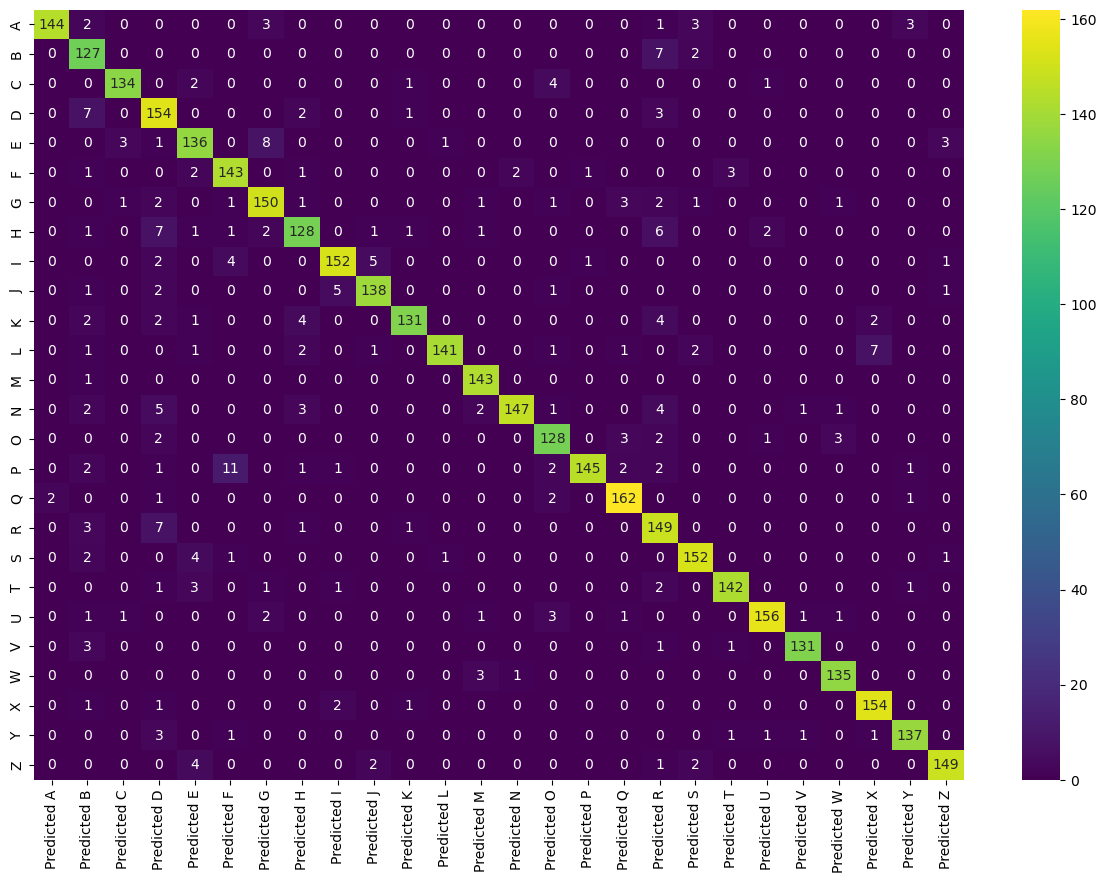

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='viridis')
plt.show()